### How to define the hand angles : 

In [3]:
import pyarrow.parquet as pq
import pandas as pd

Let's take a look at the shape of the dataframe from last competition. (1 parquet file)

In [4]:
df = pd.read_parquet("d:/Bureau/ASLCapstone/1005492440.parquet")

In [5]:
df

,frame,row_id,type,landmark_index,x,y,z
0,72,72-face-0,face,0,0.464302,0.388650,-0.055482
1,72,72-face-1,face,1,0.477606,0.338725,-0.070924
2,72,72-face-2,face,2,0.474541,0.356419,-0.045901
3,72,72-face-3,face,3,0.469740,0.307372,-0.041824
4,72,72-face-4,face,4,0.479245,0.327108,-0.071651
...,...,...,...,...,...,...,...
41263,147,147-right_hand-16,right_hand,16,NaN,NaN,NaN
41264,147,147-right_hand-17,right_hand,17,NaN,NaN,NaN
41265,147,147-right_hand-18,right_hand,18,NaN,NaN,NaN
41266,147,147-right_hand-19,right_hand,19,NaN,NaN,NaN


https://github.com/ffs333/2nd_place_GISLR/blob/main/GISLR_utils/transformer_code/train_craft.py

In [8]:
df.shape

(41268, 7)

In [9]:
df.describe

<bound method NDFrame.describe of        frame             row_id        type  landmark_index         x  \
0         72          72-face-0        face               0  0.464302   
1         72          72-face-1        face               1  0.477606   
2         72          72-face-2        face               2  0.474541   
3         72          72-face-3        face               3  0.469740   
4         72          72-face-4        face               4  0.479245   
...      ...                ...         ...             ...       ...   
41263    147  147-right_hand-16  right_hand              16       NaN   
41264    147  147-right_hand-17  right_hand              17       NaN   
41265    147  147-right_hand-18  right_hand              18       NaN   
41266    147  147-right_hand-19  right_hand              19       NaN   
41267    147  147-right_hand-20  right_hand              20       NaN   

              y         z  
0      0.388650 -0.055482  
1      0.338725 -0.070924  
2    

In [12]:
HAND_ROUTES = [
    [0, *range(0, 4)], 
    [0, *range(4, 8)], 
    [0, *range(8, 12)], 
    [0, *range(12, 16)], 
    [0, *range(16, 20)],
]
# i did -1 to all of those criteria range to have a 0 base. 

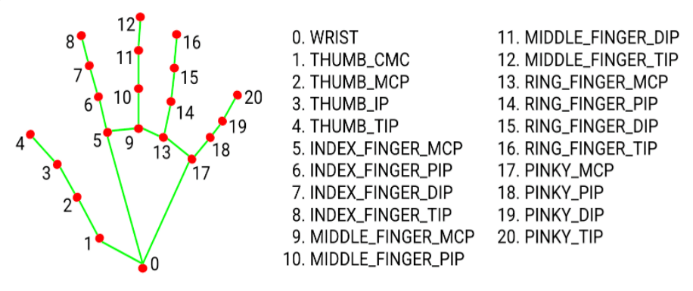

In [ ]:
HAND_ANGLES = np.array(sum([[route[i:i + 3] for i in range(len(route) - 2)] for route in HAND_ROUTES], [])),
HAND_EDGES = np.array(sum([[route[i:i + 2] for i in range(len(route) - 1)] for route in HAND_ROUTES], []))
HAND_TREES = sum([[np.array(route[i:]) for i in range(len(route) - 1)] for route in HAND_ROUTES], [])

rhand and lhand where defined as follow : 

In [ ]:
rhand = tf.concat([2 * lip[:,0:1,0:1] - rhand[...,0:1], rhand[...,1:]], -1)
lhand = tf.where(tfnp.sum(tfnp.isnan(lhand)) < tfnp.sum(tfnp.isnan(rhand)), lhand, rhand)

lhand = lhand if lhand.isnan().sum() < rhand.isnan().sum() else flip_hand(lip, rhand)

In [ ]:
lsim = F.cosine_similarity(lhand[:,HAND_ANGLES[:,0]] - lhand[:,HAND_ANGLES[:,1]],
                            lhand[:,HAND_ANGLES[:,2]] - lhand[:,HAND_ANGLES[:,1]], -1)

`F.cosine_similarity is a pytorch function, the equivalent function on tensorflow is : tf.keras.losses.cosine_similarity`